# Ceneo Analyzer
1. Wyświetlenie listy kodów produktów o których zostały pobrane opinie
2. Pobranie od użytkownika kodu produktu którego statystyki mają być policzone
3. Wczytanie z pliku JSON opinii o produkcie którego statystyki mają być policzone
4. Policzenie podstawowych statystyk
5. Przygotowanie wykresów
    - Histogram częstości ocen produktu
    - Wykres udziału rekomendacji w opiniach

1. Import bibliotek

In [14]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2. Wyświetlenie listy kodów produktów o których zostały pobrane opinie

In [4]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')], sep="\n")

149845826
162846924


3. Pobranie od użytkownika kodu produktu którego statystyki mają być policzone

In [5]:
product_code = input("Podaj kod produktu z Ceneo.pl: ")

4. Wczytanie z pliku JSON opinii o produkcie którego statystyki mają być policzone

In [17]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split('/')[0].replace(',', '.'))

5. Policzenie podstawowych statystyk

In [27]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.pros.astype(bool).sum()
average_stars = opinions.stars.astype(float).mean()
average_stars

4.85

6. Histogram częstości ocen produktu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

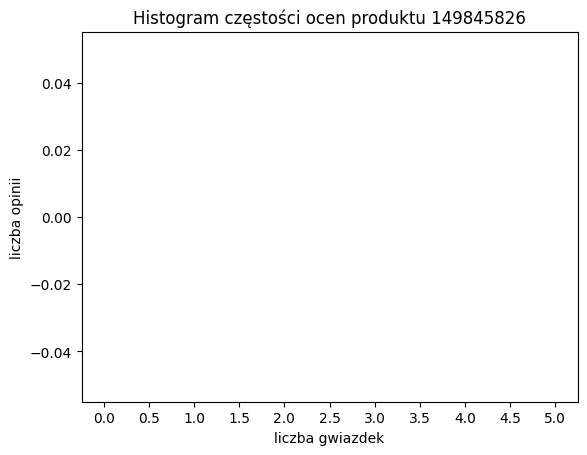

In [28]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
stars_distr.plot.bar(color='gray')
plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("liczba gwiazdek")
plt.ylabel("liczba opinii")
plt.xticks(rotation=0)

In [19]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,post_date,useful,useless
0,17644074,h...z,,5,"#Promocja-Galaxy \nTelefon jest szybki, działa...",[],[],2023-06-24 10:14:32,6,2
1,17497612,M...k,,4.5,Przesiadłam się z Samsunga A50 na A54 więc prz...,"[czas pracy na baterii, długie wsparcie, głośn...",[brak minijack],2023-05-11 18:21:22,16,2
2,17803324,o...n,,5,Nie jest to flagowiec czyli Samsung Galaxy S w...,"[czas pracy na baterii, funkcjonalność, łatwoś...",[],2023-08-15 09:56:25,6,0
3,17646953,p...a,,4.5,"Design miły dla oka, wielki plus za szkło z ty...","[czas pracy na baterii, długie wsparcie, funkc...",[],2023-06-26 11:12:01,3,2
4,18257691,c...o,,4.5,"Elegancki, bałam się że będzie za duży (do tej...","[czas pracy na baterii, funkcjonalność, głośni...",[brak minijack],2023-12-29 13:43:11,2,0
5,18384972,Paweł,,5,Po miesiącu użytkowania jestem zadowolony\nUwa...,"[czas pracy na baterii, funkcjonalność, głośni...",[],2024-02-09 13:15:51,0,1
6,17773464,Mateusz,,5,Przesiadka z LG G8s na Samsung A54. Wszystkie ...,"[czas pracy na baterii, funkcjonalność, głośni...",[],2023-08-04 10:41:56,3,1
7,17525754,w...3,,5,Jestem zadowolony z produktu,"[czas pracy na baterii, funkcjonalność, łatwoś...",[],2023-05-19 11:08:51,3,1
8,18651216,k...9,,5,Testuję telefon od kilku dni w porównaniu do m...,[],[],2024-05-15 23:05:01,1,0
9,18085406,i...n,,5,Przesiadłem się z Motoroli akurat na ten model...,[],[],2023-11-10 08:47:13,3,0
